In [1]:
# Import libraries and load dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("Data.csv")
df

,yr,inbtou_volume,inbtou_spending,covid19_cases,covid19_deaths,covid19_mortality
0,2010,812860,568930500,0,0,0.000000
1,2011,870240,598619300,0,0,0.000000
2,2012,842690,666070300,0,0,0.000000
3,2013,805550,658851600,0,0,0.000000
4,2014,792590,595796200,0,0,0.000000
5,2015,905670,589232400,0,0,0.000000
6,2016,891430,632052500,0,0,0.000000
7,2017,1059720,606311600,0,0,0.000000
8,2018,1082410,640347900,0,0,0.000000
9,2019,1054070,775349800,0,0,0.000000


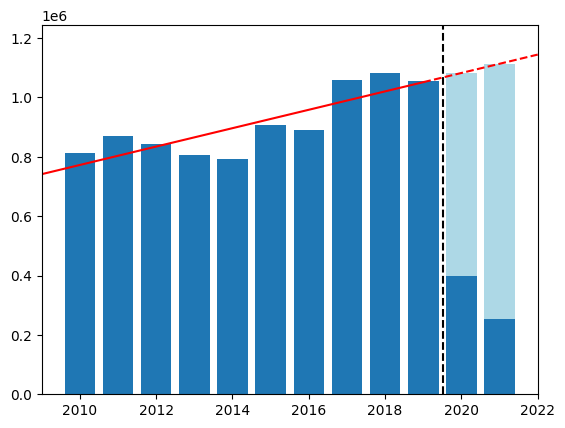

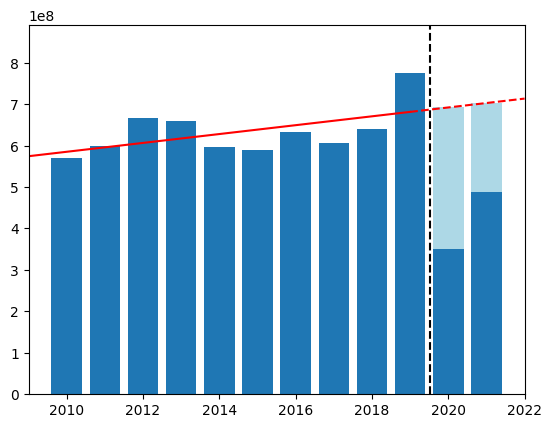

In [2]:
for varname in ('inbtou_volume', 'inbtou_spending'):
    # Determine pre-pandemic trendline using OLS
    x = df.loc[df['yr'] < 2020, 'yr']
    y = df.loc[df['yr'] < 2020, varname]
    model = sm.OLS(y, sm.add_constant(x))
    results = model.fit()

    # Set up plot
    plt.ylim(0, 1.15 * max(y))
    plt.xlim(2009, 2022)
    plt.axvline(x = 2019.51, color='black', linestyle='dashed')

    # Show trendline
    x = pd.DataFrame(range(2009, 2020))
    plt.plot(x, results.params.const + results.params.yr * x, color='red')

    # Show non-pandemic predictions
    x = pd.DataFrame(range(2019, 2023))
    y = pd.DataFrame(results.params.const + results.params.yr * x)
    plt.plot(x, y, color='red', linestyle='dashed')
    x = df.loc[df['yr'] >= 2020, 'yr']
    y = results.params.const + results.params.yr * x
    plt.bar(x, y, color='lightblue')

    # Show data
    plt.bar(df['yr'], df[varname])

    # Render plot
    plt.show()